# KE5105 - Building Electrical Consumption Forecasting

# Modelling 1 - Preliminary model using SDE-3 data

## Load libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

Using TensorFlow backend.


## Load data

In [2]:
sde3_1_df = pd.read_csv(os.path.join('source', 'sde3-data', 'no_nan', 'sde3_no_nan1.csv'), parse_dates=True)

In [3]:
sde3_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 28 columns):
Pt_timeStamp                        1380 non-null object
PWM.SDE3.IC1                        1380 non-null int64
PWM.SDE3.IC2                        1380 non-null float64
PWM.SDE3.MCC..AC.                   1380 non-null float64
PWM.CELC.IC1                        1380 non-null float64
PWM.CELC.IC2                        1380 non-null float64
PWM.SDE1                            1380 non-null float64
PWM.SDE2.SSB                        1380 non-null float64
PWM.SDE2.AC                         1380 non-null float64
PWM.SDE3.Ext                        1380 non-null float64
PWM.Street.Light                    1380 non-null float64
BTU.SDE3.Chiller.Plant              1380 non-null float64
BTU.SDE3.2                          1380 non-null float64
BTU.SDE3.1.2                        1380 non-null float64
PWM.SDE3.IC1_30min_avg              1380 non-null int64
PWM.SDE3.IC2_30min_avg      

In [4]:
sde3_1_df.iloc[:5, :5]

,Pt_timeStamp,PWM.SDE3.IC1,PWM.SDE3.IC2,PWM.SDE3.MCC..AC.,PWM.CELC.IC1
0,2016-06-01 00:30:00,9098611,8306487.5,5476307.0,1269571.50
1,2016-06-01 01:00:00,9098669,8306495.0,5476307.5,1269572.00
2,2016-06-01 01:30:00,9098729,8306501.0,5476308.0,1269572.63
3,2016-06-01 02:00:00,9098788,8306509.0,5476310.0,1269573.50
4,2016-06-01 02:30:00,9098845,8306517.0,5476311.0,1269574.00


In [5]:
sde3_1_df.iloc[:5, 5:11]

,PWM.CELC.IC2,PWM.SDE1,PWM.SDE2.SSB,PWM.SDE2.AC,PWM.SDE3.Ext,PWM.Street.Light
0,547602.31,899566.94,2505527.25,224610.72,868196.25,85832.10
1,547606.06,899573.25,2505536.25,224610.72,868200.31,85834.24
2,547610.00,899579.50,2505547.00,224610.72,868204.38,85836.35
3,547613.69,899585.94,2505557.25,224610.72,868208.50,85838.46
4,547617.50,899591.88,2505566.25,224610.72,868212.63,85840.59


In [6]:
sde3_1_df.iloc[:5, 11:15]

,BTU.SDE3.Chiller.Plant,BTU.SDE3.2,BTU.SDE3.1.2,PWM.SDE3.IC1_30min_avg
0,4150560.5,943278.94,1449962.88,60
1,4150560.5,943278.94,1449962.88,58
2,4150560.5,943278.94,1449962.88,60
3,4150560.5,943278.94,1449962.88,59
4,4150560.5,943278.94,1449962.88,57


In [7]:
sde3_1_df.iloc[:5, 15:18]

,PWM.SDE3.IC2_30min_avg,PWM.SDE3.MCC..AC._30min_avg,PWM.CELC.IC1_30min_avg
0,8.5,1.5,1.00
1,7.5,0.5,0.50
2,6.0,0.5,0.63
3,8.0,2.0,0.87
4,8.0,1.0,0.50


In [8]:
sde3_1_df.iloc[:5, 18:21]

,PWM.CELC.IC2_30min_avg,PWM.SDE1_30min_avg,PWM.SDE2.SSB_30min_avg
0,3.81,6.63,10.25
1,3.75,6.31,9.00
2,3.94,6.25,10.75
3,3.69,6.44,10.25
4,3.81,5.94,9.00


In [9]:
sde3_1_df.iloc[:5, 21:24]

,PWM.SDE2.AC_30min_avg,PWM.SDE3.Ext_30min_avg,PWM.Street.Light_30min_avg
0,0,4.12,2.09
1,0,4.06,2.14
2,0,4.07,2.11
3,0,4.12,2.11
4,0,4.13,2.13


In [10]:
sde3_1_df.iloc[:5, 24:27]

,BTU.SDE3.Chiller.Plant_30min_avg,BTU.SDE3.2_30min_avg,BTU.SDE3.1.2_30min_avg
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [11]:
sde3_1_df.iloc[:5, 27:]

,PWM_30min_avg
0,39.10
1,39.24
2,37.75
3,37.52
4,38.49


In [12]:
sde3_1_df.loc[:, 'Pt_timeStamp'] = pd.to_datetime(sde3_1_df['Pt_timeStamp'])

In [13]:
sde3_1_df['Pt_timeStamp'][:5]

0   2016-06-01 00:30:00
1   2016-06-01 01:00:00
2   2016-06-01 01:30:00
3   2016-06-01 02:00:00
4   2016-06-01 02:30:00
Name: Pt_timeStamp, dtype: datetime64[ns]

In [14]:
sde3_1_df.set_index('Pt_timeStamp', drop=True, inplace=True)

In [15]:
sde3_1_df.iloc[:5, :4]

,PWM.SDE3.IC1,PWM.SDE3.IC2,PWM.SDE3.MCC..AC.,PWM.CELC.IC1
Pt_timeStamp,,,,
2016-06-01 00:30:00,9098611,8306487.5,5476307.0,1269571.50
2016-06-01 01:00:00,9098669,8306495.0,5476307.5,1269572.00
2016-06-01 01:30:00,9098729,8306501.0,5476308.0,1269572.63
2016-06-01 02:00:00,9098788,8306509.0,5476310.0,1269573.50
2016-06-01 02:30:00,9098845,8306517.0,5476311.0,1269574.00


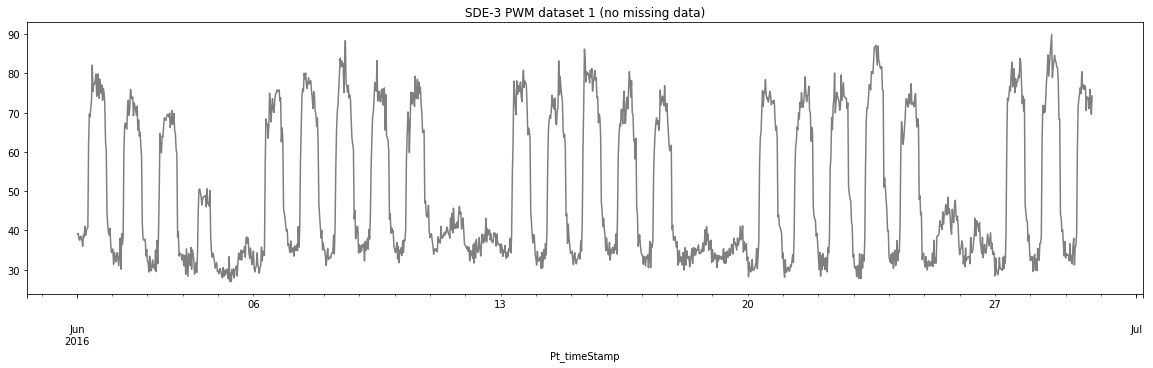

In [16]:
sde3_1_df.loc[:, 'PWM_30min_avg'].plot(figsize=(20, 5), title='SDE-3 PWM dataset 1 (no missing data)', color='black', alpha=0.5)

## Normalise the data for modelling

In [17]:
scaler = StandardScaler()
scaler.fit(sde3_1_df['PWM_30min_avg'].values.reshape(-1, 1))
sde3_1_df.loc[:, 'PWM_norm'] = scaler.transform(sde3_1_df['PWM_30min_avg'].values.reshape(-1, 1))
sde3_1_df.iloc[:5, -4:]

,BTU.SDE3.2_30min_avg,BTU.SDE3.1.2_30min_avg,PWM_30min_avg,PWM_norm
Pt_timeStamp,,,,
2016-06-01 00:30:00,0.0,0.0,39.10,-0.576075
2016-06-01 01:00:00,0.0,0.0,39.24,-0.568442
2016-06-01 01:30:00,0.0,0.0,37.75,-0.649682
2016-06-01 02:00:00,0.0,0.0,37.52,-0.662222
2016-06-01 02:30:00,0.0,0.0,38.49,-0.609334


## Split the data into train, validation and test set

In [18]:
# Generator which yields a batch of data each time it is called.
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6, verbose=0):
    
    # Set the data max index limit
    if max_index is None:
        max_index = len(data) - delay - 1
    else:
        max_index = max_index - delay
    # Set the current data start index limit
    i = min_index + lookback
    if verbose:
        print('\nstarting generator ... batch start index i = %d\n' % i)
    
    while 1:
        if verbose:
            print('\n batch start index i = %d' % i)
        if shuffle:
            # Randomly select a batch from data 
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            # Select a batch starting from i
            # if i + batch_size >= max_index:
            #     print('\nrestarting generator ... i = %d\n' % i)
            #     i = min_index + lookback
                # print('reset i ... i = %d' % i)
            rows = np.arange(i, min(i + batch_size, max_index + 1))
            if i + batch_size >= max_index:
                i = min_index + lookback
            else:
                i += len(rows)
        
        # Each row in samples is a training sample from t-lookback to t-1.
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        # Each value in targets is a training label at t+delay.
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][0]
        
        yield samples, targets

In [19]:
# Min,max indices for the datasets
train_max_idx = int(len(sde3_1_df) / 4 * 2)
val_max_idx = int(len(sde3_1_df) / 4 * 3)
print('train indices = [%d, %d], len = %d' % (0, train_max_idx-1, train_max_idx))
print('validation indices = [%d, %d, len = %d]' % (train_max_idx, val_max_idx-1, val_max_idx - train_max_idx))
print('test indices = [%d, %d], len = %d' % (val_max_idx, len(sde3_1_df)-1, len(sde3_1_df) - val_max_idx))

train indices = [0, 689], len = 690
validation indices = [690, 1034, len = 345]
test indices = [1035, 1379], len = 345


In [20]:
# Parameters for generating the datasets
lookback = 48  # 1 day; each day has 48 observations
step = 1  # sampling rate used for the lookback period
delay = 0  # 1 step ahead prediction
# batch_size = 128
batch_size = 32

In [21]:
# Generators for the train, validation and test sets.
train_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                      lookback=lookback, delay=delay, min_index=0, max_index=train_max_idx-1,
                      batch_size=batch_size, step=step)
val_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                    lookback=lookback, delay=delay, min_index=train_max_idx, max_index=val_max_idx-1,
                    batch_size=batch_size, step=step)
test_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                     lookback=lookback, delay=delay, min_index=val_max_idx, max_index=None,
                     batch_size=batch_size, step=step)

In [22]:
# Number of batches in each dataset. This is needed for training, evaluating the RNN.
train_steps = ((train_max_idx - lookback + 1 - delay) // batch_size) + 1
val_steps = ((val_max_idx - train_max_idx - lookback + 1 - delay) // batch_size) + 1
test_steps = ((len(sde3_1_df) - val_max_idx - lookback + 1 - delay) // batch_size) + 1
print('train steps = %d\nvalidation steps = %d\ntest steps = %d' % (train_steps, val_steps, test_steps))

train steps = 21
validation steps = 10
test steps = 10


## Calculate the MAE for a Simple Last Observation Carry Forward (LOCF) Model

In [23]:
# Calculate a simple baseline for model accuracy using MAE. Baseline model predicts label at t as label at t-1
# (LOCF last observation carry forward)
batch_maes = []
locf_preds = []

for a_step in range(val_steps):
    samples, targets = next(val_gen)
    a_pred = samples[:, -1, 0]
    locf_preds.append(a_pred)
    mae = np.mean(np.abs(a_pred - targets))
    batch_maes.append(mae)
print('MAE = %f' % (np.mean(batch_maes)))

MAE = 0.163532


In [24]:
print('Actual MAE without normalization = %f' % (np.mean(batch_maes) * sde3_1_df['PWM_30min_avg'].values.std()))

Actual MAE without normalization = 2.999319


In [25]:
locf_preds = scaler.inverse_transform(np.concatenate(locf_preds))
locf_preds[:10]

array([ 67.13,  66.49,  70.87,  70.56,  67.14,  73.  ,  75.49,  67.26,
        67.62,  72.56])

In [26]:
locf_preds.shape

(297,)

## Train a Baseline Recurrent Neural Network

In [27]:
model = Sequential()
model.add(layers.GRU(16, input_shape=(None, sde3_1_df['PWM_norm'].values.reshape((-1, 1)).shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae', metrics=['mape'])

In [28]:
history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=30,
                              validation_data=val_gen, validation_steps=val_steps, workers=0, use_multiprocessing=False)

Epoch 1/30


 1/21 [>.............................] - ETA: 11s - loss: 1.1054 - mean_absolute_percentage_error: 111.7520

 3/21 [===>..........................] - ETA: 3s - loss: 0.9859 - mean_absolute_percentage_error: 142.5136 

 5/21 [======>.......................] - ETA: 2s - loss: 0.9072 - mean_absolute_percentage_error: 131.2952

 7/21 [=========>....................] - ETA: 1s - loss: 0.9232 - mean_absolute_percentage_error: 121.9203

 9/21 [===========>..................] - ETA: 1s - loss: 0.9243 - mean_absolute_percentage_error: 116.3820

11/21 [==============>...............] - ETA: 0s - loss: 0.9188 - mean_absolute_percentage_error: 112.0820

13/21 [=================>............] - ETA: 0s - loss: 0.9204 - mean_absolute_percentage_error: 109.0077

15/21 [====================>.........] - ETA: 0s - loss: 0.8640 - mean_absolute_percentage_error: 105.5419

17/21 [=======================>......] - ETA: 0s - loss: 0.8274 - mean_absolute_percentage_error: 102.1855

19/21 [==========================>...] - ETA: 0s - loss: 0.8371 - mean_absolute_percentage_error: 100.5773

21/21 [==============================] - 1s 62ms/step - loss: 0.8682 - mean_absolute_percentage_error: 99.9059 - val_loss: 0.7168 - val_mean_absolute_percentage_error: 79.2630


Epoch 2/30


 1/21 [>.............................] - ETA: 0s - loss: 0.7918 - mean_absolute_percentage_error: 79.6365

 3/21 [===>..........................] - ETA: 0s - loss: 0.7178 - mean_absolute_percentage_error: 192.5246

 5/21 [======>.......................] - ETA: 0s - loss: 0.6404 - mean_absolute_percentage_error: 217.0793

 7/21 [=========>....................] - ETA: 0s - loss: 0.6458 - mean_absolute_percentage_error: 174.4556

 9/21 [===========>..................] - ETA: 0s - loss: 0.6558 - mean_absolute_percentage_error: 153.0313

12/21 [================>.............] - ETA: 0s - loss: 0.6593 - mean_absolute_percentage_error: 132.1662

14/21 [===================>..........] - ETA: 0s - loss: 0.6399 - mean_absolute_percentage_error: 122.9081

17/21 [=======================>......] - ETA: 0s - loss: 0.5725 - mean_absolute_percentage_error: 108.2898

20/21 [===========================>..] - ETA: 0s - loss: 0.5751 - mean_absolute_percentage_error: 101.4997

21/21 [==============================] - 1s 29ms/step - loss: 0.6300 - mean_absolute_percentage_error: 102.0395 - val_loss: 0.4642 - val_mean_absolute_percentage_error: 54.0801


Epoch 3/30


 1/21 [>.............................] - ETA: 0s - loss: 0.5425 - mean_absolute_percentage_error: 54.0754

 3/21 [===>..........................] - ETA: 0s - loss: 0.4966 - mean_absolute_percentage_error: 292.2665

 6/21 [=======>......................] - ETA: 0s - loss: 0.3872 - mean_absolute_percentage_error: 292.1819

 9/21 [===========>..................] - ETA: 0s - loss: 0.4183 - mean_absolute_percentage_error: 214.5035

12/21 [================>.............] - ETA: 0s - loss: 0.4227 - mean_absolute_percentage_error: 173.3077

15/21 [====================>.........] - ETA: 0s - loss: 0.3863 - mean_absolute_percentage_error: 147.0360

18/21 [========================>.....] - ETA: 0s - loss: 0.3636 - mean_absolute_percentage_error: 127.8166

21/21 [==============================] - 0s 23ms/step - loss: 0.4265 - mean_absolute_percentage_error: 119.2955 - val_loss: 0.2803 - val_mean_absolute_percentage_error: 38.1435


Epoch 4/30
 1/21 [>.............................] - ETA: 0s - loss: 0.3619 - mean_absolute_percentage_error: 38.5096

 4/21 [====>.........................] - ETA: 0s - loss: 0.2967 - mean_absolute_percentage_error: 536.9279

 7/21 [=========>....................] - ETA: 0s - loss: 0.2529 - mean_absolute_percentage_error: 322.1169

10/21 [=============>................] - ETA: 0s - loss: 0.2823 - mean_absolute_percentage_error: 240.8717

13/21 [=================>............] - ETA: 0s - loss: 0.2888 - mean_absolute_percentage_error: 195.6018

16/21 [=====================>........] - ETA: 0s - loss: 0.2591 - mean_absolute_percentage_error: 165.8238

19/21 [==========================>...] - ETA: 0s - loss: 0.2617 - mean_absolute_percentage_error: 145.5032

21/21 [==============================] - 0s 23ms/step - loss: 0.3289 - mean_absolute_percentage_error: 139.3068 - val_loss: 0.2322 - val_mean_absolute_percentage_error: 35.3897


Epoch 5/30
 1/21 [>.............................] - ETA: 0s - loss: 0.2768 - mean_absolute_percentage_error: 31.3030

 4/21 [====>.........................] - ETA: 0s - loss: 0.2530 - mean_absolute_percentage_error: 499.8274

 6/21 [=======>......................] - ETA: 0s - loss: 0.2071 - mean_absolute_percentage_error: 343.3166

 9/21 [===========>..................] - ETA: 0s - loss: 0.2343 - mean_absolute_percentage_error: 245.5774

12/21 [================>.............] - ETA: 0s - loss: 0.2513 - mean_absolute_percentage_error: 195.2922

15/21 [====================>.........] - ETA: 0s - loss: 0.2379 - mean_absolute_percentage_error: 164.5684

18/21 [========================>.....] - ETA: 0s - loss: 0.2294 - mean_absolute_percentage_error: 141.8742

21/21 [==============================] - 0s 24ms/step - loss: 0.2972 - mean_absolute_percentage_error: 130.5875 - val_loss: 0.2120 - val_mean_absolute_percentage_error: 33.7789


Epoch 6/30
 1/21 [>.............................] - ETA: 0s - loss: 0.2343 - mean_absolute_percentage_error: 27.4299

 3/21 [===>..........................] - ETA: 0s - loss: 0.2550 - mean_absolute_percentage_error: 368.5518

 5/21 [======>.......................] - ETA: 0s - loss: 0.2126 - mean_absolute_percentage_error: 370.3941

 7/21 [=========>....................] - ETA: 0s - loss: 0.1983 - mean_absolute_percentage_error: 270.5271

 9/21 [===========>..................] - ETA: 0s - loss: 0.2161 - mean_absolute_percentage_error: 222.8919

12/21 [================>.............] - ETA: 0s - loss: 0.2331 - mean_absolute_percentage_error: 177.7728

15/21 [====================>.........] - ETA: 0s - loss: 0.2212 - mean_absolute_percentage_error: 150.1871

18/21 [========================>.....] - ETA: 0s - loss: 0.2135 - mean_absolute_percentage_error: 129.6909

21/21 [==============================] - 1s 27ms/step - loss: 0.2782 - mean_absolute_percentage_error: 119.7030 - val_loss: 0.1976 - val_mean_absolute_percentage_error: 32.1018


Epoch 7/30
 1/21 [>.............................] - ETA: 0s - loss: 0.2115 - mean_absolute_percentage_error: 25.2526

 3/21 [===>..........................] - ETA: 0s - loss: 0.2353 - mean_absolute_percentage_error: 361.4495

 6/21 [=======>......................] - ETA: 0s - loss: 0.1806 - mean_absolute_percentage_error: 280.5195

 9/21 [===========>..................] - ETA: 0s - loss: 0.2022 - mean_absolute_percentage_error: 202.1165

12/21 [================>.............] - ETA: 0s - loss: 0.2182 - mean_absolute_percentage_error: 161.6122

15/21 [====================>.........] - ETA: 0s - loss: 0.2076 - mean_absolute_percentage_error: 136.9467

18/21 [========================>.....] - ETA: 0s - loss: 0.2006 - mean_absolute_percentage_error: 118.4731

21/21 [==============================] - 0s 23ms/step - loss: 0.2620 - mean_absolute_percentage_error: 109.6498 - val_loss: 0.1857 - val_mean_absolute_percentage_error: 30.4315


Epoch 8/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1964 - mean_absolute_percentage_error: 23.7087

 3/21 [===>..........................] - ETA: 0s - loss: 0.2179 - mean_absolute_percentage_error: 354.5752

 6/21 [=======>......................] - ETA: 0s - loss: 0.1704 - mean_absolute_percentage_error: 254.0359

 9/21 [===========>..................] - ETA: 0s - loss: 0.1901 - mean_absolute_percentage_error: 183.6478

12/21 [================>.............] - ETA: 0s - loss: 0.2047 - mean_absolute_percentage_error: 147.2007

15/21 [====================>.........] - ETA: 0s - loss: 0.1953 - mean_absolute_percentage_error: 125.0566

18/21 [========================>.....] - ETA: 0s - loss: 0.1889 - mean_absolute_percentage_error: 108.3737

21/21 [==============================] - 0s 24ms/step - loss: 0.2469 - mean_absolute_percentage_error: 100.5370 - val_loss: 0.1752 - val_mean_absolute_percentage_error: 28.7193


Epoch 9/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1887 - mean_absolute_percentage_error: 22.8020

 3/21 [===>..........................] - ETA: 0s - loss: 0.2029 - mean_absolute_percentage_error: 344.2943

 6/21 [=======>......................] - ETA: 0s - loss: 0.1619 - mean_absolute_percentage_error: 224.9120

 9/21 [===========>..................] - ETA: 0s - loss: 0.1794 - mean_absolute_percentage_error: 163.3591

12/21 [================>.............] - ETA: 0s - loss: 0.1926 - mean_absolute_percentage_error: 131.4343

15/21 [====================>.........] - ETA: 0s - loss: 0.1843 - mean_absolute_percentage_error: 112.1328

18/21 [========================>.....] - ETA: 0s - loss: 0.1791 - mean_absolute_percentage_error: 97.4873 

21/21 [==============================] - 0s 24ms/step - loss: 0.2335 - mean_absolute_percentage_error: 90.7579 - val_loss: 0.1676 - val_mean_absolute_percentage_error: 27.2594


Epoch 10/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1833 - mean_absolute_percentage_error: 22.0179

 4/21 [====>.........................] - ETA: 0s - loss: 0.1820 - mean_absolute_percentage_error: 279.9078

 7/21 [=========>....................] - ETA: 0s - loss: 0.1629 - mean_absolute_percentage_error: 171.8371

10/21 [=============>................] - ETA: 0s - loss: 0.1765 - mean_absolute_percentage_error: 131.6855

13/21 [=================>............] - ETA: 0s - loss: 0.1843 - mean_absolute_percentage_error: 108.9610

16/21 [=====================>........] - ETA: 0s - loss: 0.1705 - mean_absolute_percentage_error: 94.1161 

19/21 [==========================>...] - ETA: 0s - loss: 0.1731 - mean_absolute_percentage_error: 83.7244

21/21 [==============================] - 0s 23ms/step - loss: 0.2232 - mean_absolute_percentage_error: 81.3490 - val_loss: 0.1601 - val_mean_absolute_percentage_error: 26.0518


Epoch 11/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1808 - mean_absolute_percentage_error: 21.7768

 3/21 [===>..........................] - ETA: 0s - loss: 0.1838 - mean_absolute_percentage_error: 329.1044

 6/21 [=======>......................] - ETA: 0s - loss: 0.1518 - mean_absolute_percentage_error: 208.6246

 8/21 [==========>...................] - ETA: 0s - loss: 0.1605 - mean_absolute_percentage_error: 165.0547

11/21 [==============>...............] - ETA: 0s - loss: 0.1718 - mean_absolute_percentage_error: 129.6077

14/21 [===================>..........] - ETA: 0s - loss: 0.1751 - mean_absolute_percentage_error: 109.4310

17/21 [=======================>......] - ETA: 0s - loss: 0.1610 - mean_absolute_percentage_error: 93.5960 

20/21 [===========================>..] - ETA: 0s - loss: 0.1688 - mean_absolute_percentage_error: 84.3561

21/21 [==============================] - 1s 25ms/step - loss: 0.2150 - mean_absolute_percentage_error: 84.0583 - val_loss: 0.1561 - val_mean_absolute_percentage_error: 25.1702


Epoch 12/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1812 - mean_absolute_percentage_error: 21.7055

 3/21 [===>..........................] - ETA: 0s - loss: 0.1794 - mean_absolute_percentage_error: 323.7520

 6/21 [=======>......................] - ETA: 0s - loss: 0.1495 - mean_absolute_percentage_error: 224.2186

 9/21 [===========>..................] - ETA: 0s - loss: 0.1630 - mean_absolute_percentage_error: 161.3313

12/21 [================>.............] - ETA: 0s - loss: 0.1713 - mean_absolute_percentage_error: 128.5970

15/21 [====================>.........] - ETA: 0s - loss: 0.1660 - mean_absolute_percentage_error: 109.4057

18/21 [========================>.....] - ETA: 0s - loss: 0.1624 - mean_absolute_percentage_error: 95.0037 

21/21 [==============================] - 1s 24ms/step - loss: 0.2087 - mean_absolute_percentage_error: 87.8173 - val_loss: 0.1529 - val_mean_absolute_percentage_error: 24.6422


Epoch 13/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1791 - mean_absolute_percentage_error: 21.5619

 3/21 [===>..........................] - ETA: 0s - loss: 0.1769 - mean_absolute_percentage_error: 317.8085

 6/21 [=======>......................] - ETA: 0s - loss: 0.1482 - mean_absolute_percentage_error: 238.5662

 9/21 [===========>..................] - ETA: 0s - loss: 0.1607 - mean_absolute_percentage_error: 170.5429

12/21 [================>.............] - ETA: 0s - loss: 0.1676 - mean_absolute_percentage_error: 135.1492

15/21 [====================>.........] - ETA: 0s - loss: 0.1629 - mean_absolute_percentage_error: 114.5401

18/21 [========================>.....] - ETA: 0s - loss: 0.1596 - mean_absolute_percentage_error: 99.2488 

21/21 [==============================] - 1s 24ms/step - loss: 0.2036 - mean_absolute_percentage_error: 91.2477 - val_loss: 0.1519 - val_mean_absolute_percentage_error: 24.2379


Epoch 14/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1798 - mean_absolute_percentage_error: 21.5236

 3/21 [===>..........................] - ETA: 0s - loss: 0.1757 - mean_absolute_percentage_error: 310.1311

 6/21 [=======>......................] - ETA: 0s - loss: 0.1479 - mean_absolute_percentage_error: 249.8903

 9/21 [===========>..................] - ETA: 0s - loss: 0.1595 - mean_absolute_percentage_error: 177.9240

11/21 [==============>...............] - ETA: 0s - loss: 0.1621 - mean_absolute_percentage_error: 150.7340

14/21 [===================>..........] - ETA: 0s - loss: 0.1656 - mean_absolute_percentage_error: 125.5296

17/21 [=======================>......] - ETA: 0s - loss: 0.1535 - mean_absolute_percentage_error: 106.9108

19/21 [==========================>...] - ETA: 0s - loss: 0.1602 - mean_absolute_percentage_error: 98.7670 

21/21 [==============================] - 1s 26ms/step - loss: 0.1996 - mean_absolute_percentage_error: 94.0944 - val_loss: 0.1532 - val_mean_absolute_percentage_error: 23.9972


Epoch 15/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1822 - mean_absolute_percentage_error: 21.5517

 3/21 [===>..........................] - ETA: 0s - loss: 0.1761 - mean_absolute_percentage_error: 301.5777

 6/21 [=======>......................] - ETA: 0s - loss: 0.1488 - mean_absolute_percentage_error: 257.9924

 9/21 [===========>..................] - ETA: 0s - loss: 0.1595 - mean_absolute_percentage_error: 183.2106

12/21 [================>.............] - ETA: 0s - loss: 0.1650 - mean_absolute_percentage_error: 144.3285

15/21 [====================>.........] - ETA: 0s - loss: 0.1610 - mean_absolute_percentage_error: 121.8735

18/21 [========================>.....] - ETA: 0s - loss: 0.1576 - mean_absolute_percentage_error: 105.3026

21/21 [==============================] - 1s 24ms/step - loss: 0.1976 - mean_absolute_percentage_error: 96.1357 - val_loss: 0.1511 - val_mean_absolute_percentage_error: 23.8064


Epoch 16/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1787 - mean_absolute_percentage_error: 21.3258

 3/21 [===>..........................] - ETA: 0s - loss: 0.1752 - mean_absolute_percentage_error: 299.9885

 6/21 [=======>......................] - ETA: 0s - loss: 0.1485 - mean_absolute_percentage_error: 265.5936

 9/21 [===========>..................] - ETA: 0s - loss: 0.1591 - mean_absolute_percentage_error: 188.2232

12/21 [================>.............] - ETA: 0s - loss: 0.1645 - mean_absolute_percentage_error: 148.0531

15/21 [====================>.........] - ETA: 0s - loss: 0.1603 - mean_absolute_percentage_error: 124.7981

18/21 [========================>.....] - ETA: 0s - loss: 0.1571 - mean_absolute_percentage_error: 107.7328

21/21 [==============================] - 1s 25ms/step - loss: 0.1957 - mean_absolute_percentage_error: 98.1027 - val_loss: 0.1510 - val_mean_absolute_percentage_error: 23.6325


Epoch 17/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1796 - mean_absolute_percentage_error: 21.3536

 3/21 [===>..........................] - ETA: 0s - loss: 0.1756 - mean_absolute_percentage_error: 296.7729

 6/21 [=======>......................] - ETA: 0s - loss: 0.1489 - mean_absolute_percentage_error: 269.5508

 8/21 [==========>...................] - ETA: 0s - loss: 0.1563 - mean_absolute_percentage_error: 210.1069

11/21 [==============>...............] - ETA: 0s - loss: 0.1610 - mean_absolute_percentage_error: 161.0275

14/21 [===================>..........] - ETA: 0s - loss: 0.1642 - mean_absolute_percentage_error: 133.4185

17/21 [=======================>......] - ETA: 0s - loss: 0.1527 - mean_absolute_percentage_error: 113.4520

20/21 [===========================>..] - ETA: 0s - loss: 0.1596 - mean_absolute_percentage_error: 100.8358

21/21 [==============================] - 1s 26ms/step - loss: 0.1945 - mean_absolute_percentage_error: 99.0380 - val_loss: 0.1510 - val_mean_absolute_percentage_error: 23.5526


Epoch 18/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1790 - mean_absolute_percentage_error: 21.2473

 3/21 [===>..........................] - ETA: 0s - loss: 0.1754 - mean_absolute_percentage_error: 293.4474

 6/21 [=======>......................] - ETA: 0s - loss: 0.1490 - mean_absolute_percentage_error: 271.7526

 9/21 [===========>..................] - ETA: 0s - loss: 0.1586 - mean_absolute_percentage_error: 192.1788

12/21 [================>.............] - ETA: 0s - loss: 0.1638 - mean_absolute_percentage_error: 150.9386

15/21 [====================>.........] - ETA: 0s - loss: 0.1598 - mean_absolute_percentage_error: 127.0763

18/21 [========================>.....] - ETA: 0s - loss: 0.1567 - mean_absolute_percentage_error: 109.6262

21/21 [==============================] - 1s 25ms/step - loss: 0.1931 - mean_absolute_percentage_error: 99.5451 - val_loss: 0.1510 - val_mean_absolute_percentage_error: 23.4664


Epoch 19/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1787 - mean_absolute_percentage_error: 21.1846

 3/21 [===>..........................] - ETA: 0s - loss: 0.1753 - mean_absolute_percentage_error: 291.8563

 6/21 [=======>......................] - ETA: 0s - loss: 0.1488 - mean_absolute_percentage_error: 274.0044

 9/21 [===========>..................] - ETA: 0s - loss: 0.1582 - mean_absolute_percentage_error: 193.6125

12/21 [================>.............] - ETA: 0s - loss: 0.1634 - mean_absolute_percentage_error: 151.9833

15/21 [====================>.........] - ETA: 0s - loss: 0.1594 - mean_absolute_percentage_error: 127.9032

17/21 [=======================>......] - ETA: 0s - loss: 0.1521 - mean_absolute_percentage_error: 114.9327

20/21 [===========================>..] - ETA: 0s - loss: 0.1588 - mean_absolute_percentage_error: 102.0459

21/21 [==============================] - 1s 26ms/step - loss: 0.1918 - mean_absolute_percentage_error: 100.0696 - val_loss: 0.1509 - val_mean_absolute_percentage_error: 23.4277


Epoch 20/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1779 - mean_absolute_percentage_error: 21.1097

 3/21 [===>..........................] - ETA: 0s - loss: 0.1749 - mean_absolute_percentage_error: 289.9882

 6/21 [=======>......................] - ETA: 0s - loss: 0.1490 - mean_absolute_percentage_error: 274.7332

 9/21 [===========>..................] - ETA: 0s - loss: 0.1579 - mean_absolute_percentage_error: 194.0205

12/21 [================>.............] - ETA: 0s - loss: 0.1630 - mean_absolute_percentage_error: 152.2295

14/21 [===================>..........] - ETA: 0s - loss: 0.1629 - mean_absolute_percentage_error: 135.3762

17/21 [=======================>......] - ETA: 0s - loss: 0.1518 - mean_absolute_percentage_error: 115.0691

20/21 [===========================>..] - ETA: 0s - loss: 0.1584 - mean_absolute_percentage_error: 102.1363

21/21 [==============================] - 1s 26ms/step - loss: 0.1910 - mean_absolute_percentage_error: 100.1232 - val_loss: 0.1503 - val_mean_absolute_percentage_error: 23.3072


Epoch 21/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1788 - mean_absolute_percentage_error: 21.1837

 3/21 [===>..........................] - ETA: 0s - loss: 0.1749 - mean_absolute_percentage_error: 289.5384

 6/21 [=======>......................] - ETA: 0s - loss: 0.1487 - mean_absolute_percentage_error: 274.3284

 9/21 [===========>..................] - ETA: 0s - loss: 0.1575 - mean_absolute_percentage_error: 193.7255

11/21 [==============>...............] - ETA: 0s - loss: 0.1595 - mean_absolute_percentage_error: 163.4074

14/21 [===================>..........] - ETA: 0s - loss: 0.1625 - mean_absolute_percentage_error: 135.1555

17/21 [=======================>......] - ETA: 0s - loss: 0.1514 - mean_absolute_percentage_error: 114.8905

20/21 [===========================>..] - ETA: 0s - loss: 0.1581 - mean_absolute_percentage_error: 101.9911

21/21 [==============================] - 1s 26ms/step - loss: 0.1899 - mean_absolute_percentage_error: 99.9393 - val_loss: 0.1506 - val_mean_absolute_percentage_error: 23.3353


Epoch 22/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1781 - mean_absolute_percentage_error: 21.1377

 3/21 [===>..........................] - ETA: 0s - loss: 0.1748 - mean_absolute_percentage_error: 287.3195

 6/21 [=======>......................] - ETA: 0s - loss: 0.1493 - mean_absolute_percentage_error: 274.9459

 9/21 [===========>..................] - ETA: 0s - loss: 0.1575 - mean_absolute_percentage_error: 194.0757

11/21 [==============>...............] - ETA: 0s - loss: 0.1594 - mean_absolute_percentage_error: 163.6908

13/21 [=================>............] - ETA: 0s - loss: 0.1644 - mean_absolute_percentage_error: 142.3921

16/21 [=====================>........] - ETA: 0s - loss: 0.1547 - mean_absolute_percentage_error: 120.9708

19/21 [==========================>...] - ETA: 0s - loss: 0.1576 - mean_absolute_percentage_error: 105.9441

21/21 [==============================] - 1s 26ms/step - loss: 0.1895 - mean_absolute_percentage_error: 100.0679 - val_loss: 0.1488 - val_mean_absolute_percentage_error: 23.2196


Epoch 23/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1766 - mean_absolute_percentage_error: 21.0750

 3/21 [===>..........................] - ETA: 0s - loss: 0.1740 - mean_absolute_percentage_error: 289.7723

 6/21 [=======>......................] - ETA: 0s - loss: 0.1482 - mean_absolute_percentage_error: 275.7682

 8/21 [==========>...................] - ETA: 0s - loss: 0.1554 - mean_absolute_percentage_error: 214.6894

11/21 [==============>...............] - ETA: 0s - loss: 0.1586 - mean_absolute_percentage_error: 164.0724

14/21 [===================>..........] - ETA: 0s - loss: 0.1617 - mean_absolute_percentage_error: 135.6227

17/21 [=======================>......] - ETA: 0s - loss: 0.1509 - mean_absolute_percentage_error: 115.2816

20/21 [===========================>..] - ETA: 0s - loss: 0.1575 - mean_absolute_percentage_error: 102.3123

21/21 [==============================] - 1s 25ms/step - loss: 0.1885 - mean_absolute_percentage_error: 100.1818 - val_loss: 0.1494 - val_mean_absolute_percentage_error: 23.1947


Epoch 24/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1781 - mean_absolute_percentage_error: 21.1640

 3/21 [===>..........................] - ETA: 0s - loss: 0.1743 - mean_absolute_percentage_error: 287.2393

 5/21 [======>.......................] - ETA: 0s - loss: 0.1608 - mean_absolute_percentage_error: 327.9270

 8/21 [==========>...................] - ETA: 0s - loss: 0.1559 - mean_absolute_percentage_error: 214.0718

11/21 [==============>...............] - ETA: 0s - loss: 0.1588 - mean_absolute_percentage_error: 163.5900

14/21 [===================>..........] - ETA: 0s - loss: 0.1617 - mean_absolute_percentage_error: 135.2170

17/21 [=======================>......] - ETA: 0s - loss: 0.1509 - mean_absolute_percentage_error: 114.9552

20/21 [===========================>..] - ETA: 0s - loss: 0.1575 - mean_absolute_percentage_error: 102.0203

21/21 [==============================] - 1s 26ms/step - loss: 0.1880 - mean_absolute_percentage_error: 99.8744 - val_loss: 0.1490 - val_mean_absolute_percentage_error: 23.1320


Epoch 25/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1783 - mean_absolute_percentage_error: 21.1901

 3/21 [===>..........................] - ETA: 0s - loss: 0.1741 - mean_absolute_percentage_error: 286.9602

 6/21 [=======>......................] - ETA: 0s - loss: 0.1483 - mean_absolute_percentage_error: 274.6574

 9/21 [===========>..................] - ETA: 0s - loss: 0.1566 - mean_absolute_percentage_error: 193.8137

11/21 [==============>...............] - ETA: 0s - loss: 0.1585 - mean_absolute_percentage_error: 163.4222

13/21 [=================>............] - ETA: 0s - loss: 0.1634 - mean_absolute_percentage_error: 142.1119

15/21 [====================>.........] - ETA: 0s - loss: 0.1575 - mean_absolute_percentage_error: 127.7792

17/21 [=======================>......] - ETA: 0s - loss: 0.1506 - mean_absolute_percentage_error: 114.8502

19/21 [==========================>...] - ETA: 0s - loss: 0.1567 - mean_absolute_percentage_error: 105.7029

21/21 [==============================] - 1s 29ms/step - loss: 0.1870 - mean_absolute_percentage_error: 99.7206 - val_loss: 0.1501 - val_mean_absolute_percentage_error: 23.1760


Epoch 26/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1789 - mean_absolute_percentage_error: 21.2144

 3/21 [===>..........................] - ETA: 0s - loss: 0.1743 - mean_absolute_percentage_error: 283.5725

 6/21 [=======>......................] - ETA: 0s - loss: 0.1492 - mean_absolute_percentage_error: 274.4508

 9/21 [===========>..................] - ETA: 0s - loss: 0.1572 - mean_absolute_percentage_error: 193.6938

11/21 [==============>...............] - ETA: 0s - loss: 0.1589 - mean_absolute_percentage_error: 163.3352

14/21 [===================>..........] - ETA: 0s - loss: 0.1617 - mean_absolute_percentage_error: 135.0002

16/21 [=====================>........] - ETA: 0s - loss: 0.1542 - mean_absolute_percentage_error: 120.6783

18/21 [========================>.....] - ETA: 0s - loss: 0.1549 - mean_absolute_percentage_error: 110.1408

20/21 [===========================>..] - ETA: 0s - loss: 0.1572 - mean_absolute_percentage_error: 101.8407

21/21 [==============================] - 1s 28ms/step - loss: 0.1867 - mean_absolute_percentage_error: 99.6349 - val_loss: 0.1497 - val_mean_absolute_percentage_error: 23.1058


Epoch 27/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1794 - mean_absolute_percentage_error: 21.2645

 3/21 [===>..........................] - ETA: 0s - loss: 0.1743 - mean_absolute_percentage_error: 283.4019

 6/21 [=======>......................] - ETA: 0s - loss: 0.1491 - mean_absolute_percentage_error: 273.9585

 8/21 [==========>...................] - ETA: 0s - loss: 0.1563 - mean_absolute_percentage_error: 213.3590

11/21 [==============>...............] - ETA: 0s - loss: 0.1588 - mean_absolute_percentage_error: 163.0359

14/21 [===================>..........] - ETA: 0s - loss: 0.1615 - mean_absolute_percentage_error: 134.7373

17/21 [=======================>......] - ETA: 0s - loss: 0.1509 - mean_absolute_percentage_error: 114.5798

19/21 [==========================>...] - ETA: 0s - loss: 0.1568 - mean_absolute_percentage_error: 105.4559

21/21 [==============================] - 1s 28ms/step - loss: 0.1864 - mean_absolute_percentage_error: 99.4475 - val_loss: 0.1483 - val_mean_absolute_percentage_error: 22.9993


Epoch 28/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1789 - mean_absolute_percentage_error: 21.2525

 3/21 [===>..........................] - ETA: 0s - loss: 0.1738 - mean_absolute_percentage_error: 285.7058

 5/21 [======>.......................] - ETA: 0s - loss: 0.1600 - mean_absolute_percentage_error: 326.0869

 8/21 [==========>...................] - ETA: 0s - loss: 0.1557 - mean_absolute_percentage_error: 212.9471

11/21 [==============>...............] - ETA: 0s - loss: 0.1582 - mean_absolute_percentage_error: 162.6908

13/21 [=================>............] - ETA: 0s - loss: 0.1629 - mean_absolute_percentage_error: 141.4617

15/21 [====================>.........] - ETA: 0s - loss: 0.1571 - mean_absolute_percentage_error: 127.2069

17/21 [=======================>......] - ETA: 0s - loss: 0.1505 - mean_absolute_percentage_error: 114.3503

20/21 [===========================>..] - ETA: 0s - loss: 0.1567 - mean_absolute_percentage_error: 101.4419

21/21 [==============================] - 1s 27ms/step - loss: 0.1854 - mean_absolute_percentage_error: 99.1971 - val_loss: 0.1495 - val_mean_absolute_percentage_error: 23.0362


Epoch 29/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1803 - mean_absolute_percentage_error: 21.3339

 3/21 [===>..........................] - ETA: 0s - loss: 0.1744 - mean_absolute_percentage_error: 282.0931

 5/21 [======>.......................] - ETA: 0s - loss: 0.1612 - mean_absolute_percentage_error: 325.8924

 8/21 [==========>...................] - ETA: 0s - loss: 0.1565 - mean_absolute_percentage_error: 212.8578

10/21 [=============>................] - ETA: 0s - loss: 0.1584 - mean_absolute_percentage_error: 175.7595

12/21 [================>.............] - ETA: 0s - loss: 0.1615 - mean_absolute_percentage_error: 151.1957

15/21 [====================>.........] - ETA: 0s - loss: 0.1576 - mean_absolute_percentage_error: 127.1628

17/21 [=======================>......] - ETA: 0s - loss: 0.1509 - mean_absolute_percentage_error: 114.3144

19/21 [==========================>...] - ETA: 0s - loss: 0.1568 - mean_absolute_percentage_error: 105.2143

21/21 [==============================] - 1s 28ms/step - loss: 0.1855 - mean_absolute_percentage_error: 99.1712 - val_loss: 0.1474 - val_mean_absolute_percentage_error: 22.9400


Epoch 30/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1781 - mean_absolute_percentage_error: 21.2373

 3/21 [===>..........................] - ETA: 0s - loss: 0.1734 - mean_absolute_percentage_error: 285.1573

 5/21 [======>.......................] - ETA: 0s - loss: 0.1596 - mean_absolute_percentage_error: 326.0299

 7/21 [=========>....................] - ETA: 0s - loss: 0.1558 - mean_absolute_percentage_error: 238.3577

10/21 [=============>................] - ETA: 0s - loss: 0.1575 - mean_absolute_percentage_error: 175.7704

13/21 [=================>............] - ETA: 0s - loss: 0.1626 - mean_absolute_percentage_error: 141.4115

16/21 [=====================>........] - ETA: 0s - loss: 0.1535 - mean_absolute_percentage_error: 120.1802

19/21 [==========================>...] - ETA: 0s - loss: 0.1561 - mean_absolute_percentage_error: 105.1936

21/21 [==============================] - 1s 28ms/step - loss: 0.1841 - mean_absolute_percentage_error: 99.0821 - val_loss: 0.1494 - val_mean_absolute_percentage_error: 22.9933


In [29]:
history.history

{'loss': [0.8306744354907597,
  0.57888749009723606,
  0.36453522440057678,
  0.26644273673262553,
  0.23736192689877805,
  0.22127460950631589,
  0.20797693617990085,
  0.19579722391110715,
  0.18535297979075591,
  0.17763900756835938,
  0.17191581079893023,
  0.16821214306020291,
  0.16529596111856146,
  0.16345075766245523,
  0.16298906101244631,
  0.16224310572645004,
  0.16199016199676419,
  0.16153943055886716,
  0.16107043410387367,
  0.16063362972758641,
  0.1602504058418987,
  0.16024415403883033,
  0.15964023142217476,
  0.1595794556668243,
  0.15914067635283663,
  0.1592252887669382,
  0.15920045089870227,
  0.158669001216829,
  0.15915452654116621,
  0.15832487537853443],
 'mean_absolute_percentage_error': [99.559674984940855,
  101.53659587634316,
  119.3906251426055,
  140.52098520819644,
  131.66581112870546,
  120.52804750816844,
  110.25142215716876,
  100.95636480693877,
  90.962295864972745,
  81.325956540687059,
  84.335765660366164,
  88.438806789315009,
  92.17779

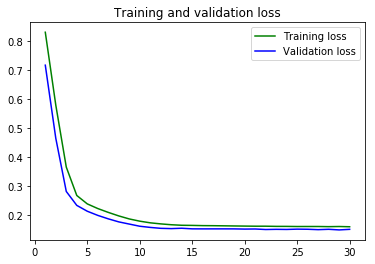

In [30]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.figure()
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Plot the Training Set Results

In [31]:
train_preds = model.predict_generator(train_gen, steps=train_steps, workers=0)
train_preds = scaler.inverse_transform(train_preds)
train_preds[:10]

array([[ 34.69889832],
       [ 35.31665421],
       [ 33.29944992],
       [ 34.29138565],
       [ 34.64654922],
       [ 33.71907425],
       [ 34.10473251],
       [ 35.22142792],
       [ 34.54053879],
       [ 32.91159821]], dtype=float32)

In [32]:
train_preds.shape

(642, 1)

Text(0.5,1,'SDE-3 PWM dataset 1 training vs predicted')

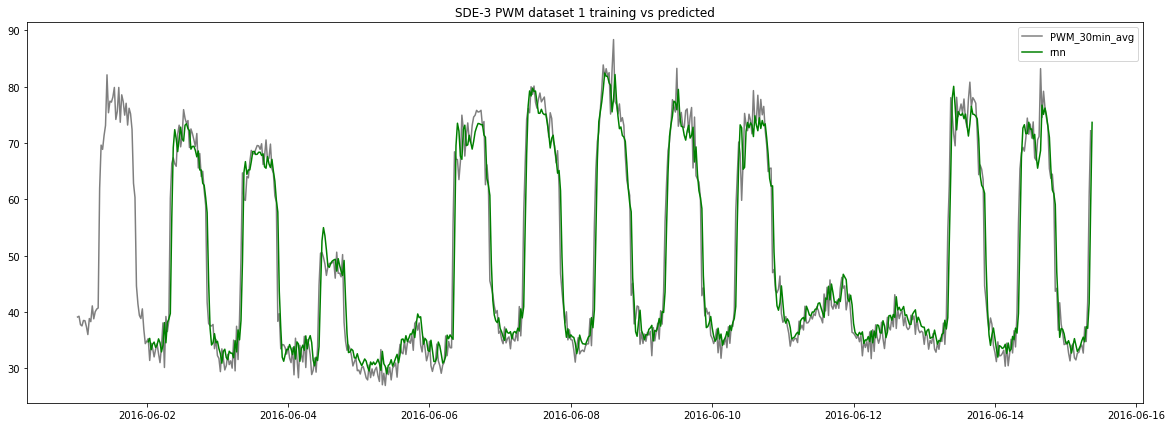

In [33]:
plt.figure(figsize=(20, 7))
plt.plot(sde3_1_df.iloc[:train_max_idx-1, sde3_1_df.columns.get_loc('PWM_30min_avg')], color='black', alpha=0.5)
plt.plot(sde3_1_df.index[lookback:lookback+len(train_preds)], train_preds, color='green', label='rnn')
plt.legend()
plt.title('SDE-3 PWM dataset 1 training vs predicted')

## Plot the Validation Set Results

In [34]:
val_preds = model.predict_generator(val_gen, steps=val_steps, workers=0)
val_preds = scaler.inverse_transform(val_preds)
val_preds[:10]

array([[ 71.07936096],
       [ 70.30309296],
       [ 71.70813751],
       [ 71.73760223],
       [ 68.91366577],
       [ 70.99234772],
       [ 73.64468384],
       [ 69.22846222],
       [ 66.76040649],
       [ 69.07901764]], dtype=float32)

In [35]:
val_preds.shape

(297, 1)

Text(0.5,1,'SDE-3 PWM dataset 1 validation vs predicted')

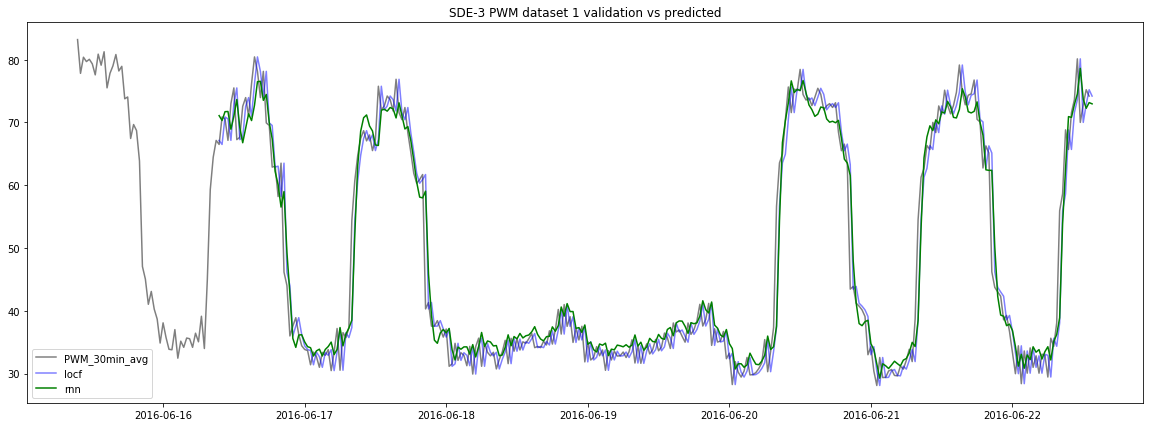

In [36]:
plt.figure(figsize=(20, 7))
plt.plot(sde3_1_df.iloc[train_max_idx:(val_max_idx-1), sde3_1_df.columns.get_loc('PWM_30min_avg')],
         color='black', alpha=0.5)
plt.plot(sde3_1_df.index[(train_max_idx+lookback):(train_max_idx+lookback+len(locf_preds))], locf_preds,
         color='blue', alpha=0.5, label='locf')
plt.plot(sde3_1_df.index[(train_max_idx+lookback):(train_max_idx+lookback+len(val_preds))], val_preds,
         color='green', label='rnn')
plt.legend()
plt.title('SDE-3 PWM dataset 1 validation vs predicted')

Text(0.5,1,'SDE-3 PWM dataset 1 validation vs predicted')

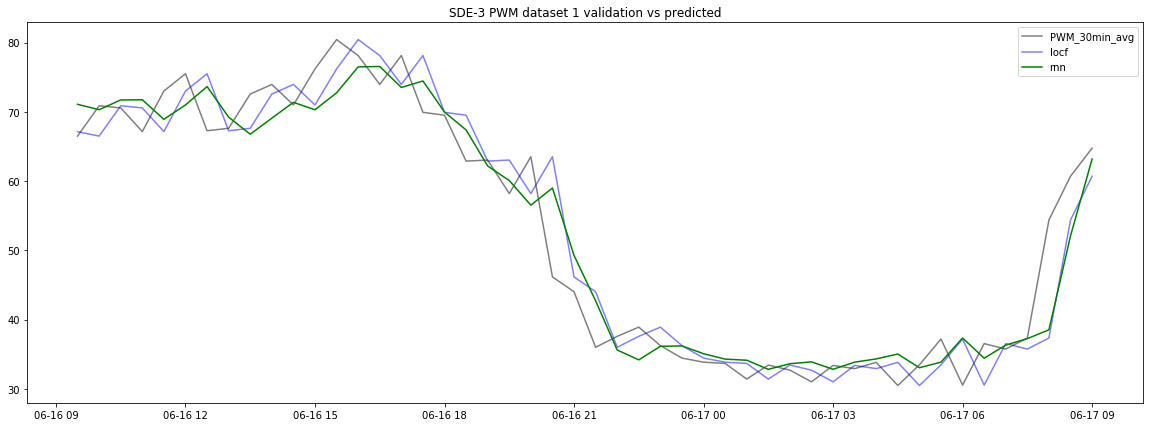

In [37]:
plt.figure(figsize=(20, 7))
plt.plot(sde3_1_df.iloc[train_max_idx+lookback:train_max_idx+lookback+48, sde3_1_df.columns.get_loc('PWM_30min_avg')],
         color='black', alpha=0.5)
plt.plot(sde3_1_df.index[train_max_idx+lookback:train_max_idx+lookback+48], locf_preds[:48],
         color='blue', alpha=0.5, label='locf')
plt.plot(sde3_1_df.index[train_max_idx+lookback:train_max_idx+lookback+48], val_preds[:48],
         color='green', label='rnn')
plt.legend()
plt.title('SDE-3 PWM dataset 1 validation vs predicted')

In [38]:
eval = model.evaluate_generator(val_gen, steps=val_steps, workers=0)
eval

[0.14941622020820977, 22.993297750299629]

In [39]:
history.history['loss'][-1]

0.15832487537853443

## Plot the Validation Curve

In [40]:
# Train and evaluate models with different number of hidden nodes.
val_curve_res = []
for i in [4, 8, 16, 32, 64, 128]:
    # Model specifications
    model = Sequential()
    model.add(layers.GRU(i, input_shape=(None, sde3_1_df['PWM_norm'].values.reshape((-1, 1)).shape[-1])))
    model.add(layers.Dense(1))
    model.compile(optimizer=RMSprop(), loss='mae', metrics=['mape'])
    # Fit model
    print('Fitting model with %d hidden nodes ...' % i)
    history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=30,
                                  validation_data=val_gen, validation_steps=val_steps,
                                  workers=0, use_multiprocessing=False, verbose=0)
    # Add eval results to list
    val_curve_res.append([i, history.history['loss'][-1], history.history['val_loss'][-1]])

Fitting model with 4 hidden nodes ...


Fitting model with 8 hidden nodes ...


Fitting model with 16 hidden nodes ...


Fitting model with 32 hidden nodes ...


Fitting model with 64 hidden nodes ...


Fitting model with 128 hidden nodes ...


In [41]:
val_curve_res

[[4, 0.16400149845259954, 0.15273197913410688],
 [8, 0.15579263814884553, 0.14546445017109816],
 [16, 0.15875567305496549, 0.15051693160726567],
 [32, 0.15981510457962844, 0.15756825149460674],
 [64, 0.15893327150018044, 0.16566758665572914],
 [128, 0.16134914774389653, 0.16483116039523371]]

Text(0.5,1,'Validation curve for base RNN model')

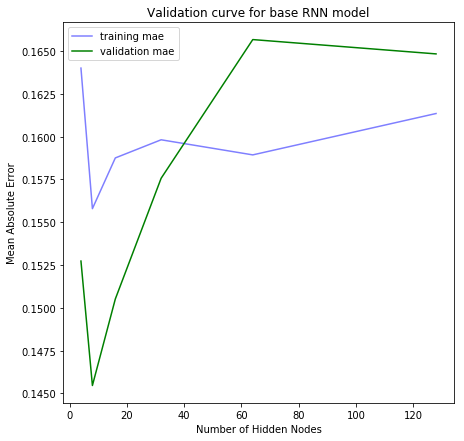

In [42]:
val_curve_res = np.array(val_curve_res)
plt.figure(figsize=(7, 7))
plt.plot(val_curve_res[:, 0], val_curve_res[:, 1], color='blue', alpha=0.5, label='training mae')
plt.plot(val_curve_res[:, 0], val_curve_res[:, 2], color='green', label='validation mae')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Validation curve for base RNN model')

The validation MAE increases when the number of hidden nodes exceeds 8, showing signs of model overfitting.

## Plot the Learning Curve

In [43]:
# Train and evaluate a model with fitted with different number of samples in the training set.
learn_curve_res = []
for i in [114, 229, 344, 459, 574, 689]:  # i is the max index
    # Model specifications
    model = Sequential()
    model.add(layers.GRU(8, input_shape=(None, sde3_1_df['PWM_norm'].values.reshape((-1, 1)).shape[-1])))
    model.add(layers.Dense(1))
    model.compile(optimizer=RMSprop(), loss='mae', metrics=['mape'])
    # generator
    a_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                      lookback=lookback, delay=delay, min_index=0, max_index=i-1,
                      batch_size=batch_size, step=step)
    tr_steps = ((i - lookback + 1 - delay) // batch_size) + 1
    # Fit model
    print('Fitting model with %d samples' % (i + 1))
    history = model.fit_generator(a_gen, steps_per_epoch=tr_steps, epochs=30,
                                  validation_data=val_gen, validation_steps=val_steps,
                                  workers=0, use_multiprocessing=False, verbose=0)
    # Add eval results to list
    learn_curve_res.append([i, history.history['loss'][-1], history.history['val_loss'][-1]])

Fitting model with 115 samples


Fitting model with 230 samples


Fitting model with 345 samples


Fitting model with 460 samples


Fitting model with 575 samples


Fitting model with 690 samples


In [44]:
learn_curve_res

[[114, 0.83943869128371729, 0.85226433606260155],
 [229, 0.19634253902165272, 0.21364989174335491],
 [344, 0.16480511829659744, 0.15944870227715785],
 [459, 0.16988474765108161, 0.15195015710010271],
 [574, 0.15614916732669329, 0.1513501980690041],
 [689, 0.15469956362531298, 0.14475905754750826]]

Text(0.5,1,'Learning curve for base RNN model')

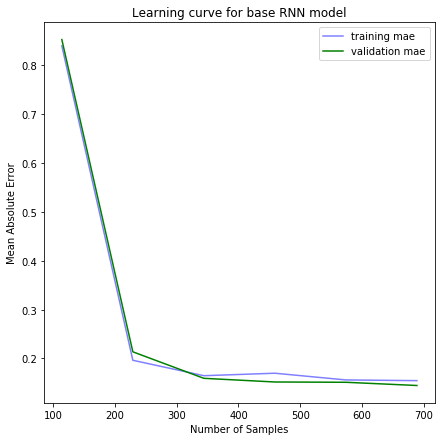

In [45]:
learn_curve_res = np.array(learn_curve_res)
plt.figure(figsize=(7, 7))
plt.plot(learn_curve_res[:, 0], learn_curve_res[:, 1], color='blue', alpha=0.5, label='training mae')
plt.plot(learn_curve_res[:, 0], learn_curve_res[:, 2], color='green', label='validation mae')
plt.xlabel('Number of Samples')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Learning curve for base RNN model')

The learning curves for training and validation losses have converged. More data will not be beneficial for lowering the model loss.

## Score the base RNN model on the test set

In [46]:
comb_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                     lookback=lookback, delay=delay, min_index=0, max_index=val_max_idx - 1,
                     batch_size=batch_size, step=step)
comb_steps = ((val_max_idx - lookback + 1 - delay) // batch_size) + 1

In [47]:
model = Sequential()
model.add(layers.GRU(8, input_shape=(None, sde3_1_df['PWM_norm'].values.reshape((-1, 1)).shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae', metrics=['mape'])

In [48]:
history = model.fit_generator(comb_gen, steps_per_epoch=comb_steps, epochs=30,
                              validation_data=None, validation_steps=None,
                              workers=0, use_multiprocessing=False, verbose=0)

In [49]:
test_score = model.evaluate_generator(test_gen, steps=test_steps, workers=0)
test_score

[0.16622472486712717, 34.172186093699651]